### Blue Blazer Portfolio : Target Pice Research

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#TICKERS 

tickers = [ 'DIS', 'CBS', 
 'AMZN','BKS', 'WMT' ,
 'CAT', 'DE' , 'TEX',  
 'MSFT', 'GOOGL', 'AAPL', 'ORCL' , 
# 'AAPL', 'GOOGL', 'MSFT',
 'WFC' , 'BAC' , 'JPM',
 'EBAY',  'MELI',
 'C', 
 'BA', 'ERJ','LMT',
 'GWRS', 'AWK', 'WTR', 'AWR' ]

In [0]:
# PE/PEG libraries
import time
import requests
from bs4 import BeautifulSoup
import progressbar

req = requests.get("https://finviz.com/quote.ashx?t=FB")
soup = BeautifulSoup(req.content, 'html.parser')

In [0]:
# STEP (1) DEFINITION FOR WEB - SRAPING PE/PEG
####################################
def scrape_finviz(symbols):
    # Get Column Header
    req = requests.get("https://finviz.com/quote.ashx?t=FB")
    soup = BeautifulSoup(req.content, 'html.parser')
    table = soup.find_all(lambda tag: tag.name=='table')
    rows = table[8].findAll(lambda tag: tag.name=='tr')
    out=[]
    for i in range(len(rows)):
        td=rows[i].find_all('td')
        out=out+[x.text for x in td]

    ls=['Ticker']+out[::2]  

    dict_ls={k:ls[k] for k in range(len(ls))}
    df=pd.DataFrame()
    p = progressbar.ProgressBar()
    p.start()
    for j in range(len(symbols)):
        p.update(j/len(symbols) * 100)
        req = requests.get("https://finviz.com/quote.ashx?t="+symbols[j])
        if req.status_code !=200:
            continue
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find_all(lambda tag: tag.name=='table')
        rows = table[8].findAll(lambda tag: tag.name=='tr')
        out=[]
        for i in range(len(rows)):
            td=rows[i].find_all('td')
            out=out+[x.text for x in td]
        out=[symbols[j]]+out[1::2]
        out_df=pd.DataFrame(out).transpose()
        df=df.append(out_df,ignore_index=True)

    p.finish()
    df=df.rename(columns=dict_ls)  

    return(df)

In [0]:
data = scrape_finviz(tickers)

| |                                        #         | 96 Elapsed Time: 0:00:45


In [0]:
#data.columns

In [0]:
data.head(5)

,Ticker,Index,P/E,EPS (ttm),Insider Own,Shs Outstand,Perf Week,Market Cap,Forward P/E,EPS next Y,...,Earnings,Payout,Avg Volume,Price,Recom,SMA20,SMA50,SMA200,Volume,Change
0,DIS,DJIA S&P500,15.20,7.24,0.10%,1.49B,-3.59%,163.89B,15.28,7.20,...,Feb 05 AMC,23.40%,9.67M,108.66,2.20,-4.41%,-3.25%,-2.64%,"26,866,743",-1.21%
1,CBS,S&P 500,9.23,5.00,0.30%,377.26M,-5.22%,17.41B,7.02,6.57,...,Feb 14 AMC,13.90%,3.18M,46.10,2.30,-6.58%,-6.26%,-12.67%,"4,682,612",-0.13%
2,AMZN,S&P 500,90.62,19.83,16.10%,483.70M,6.30%,869.34B,44.98,39.96,...,Jan 31 AMC,0.00%,5.66M,1819.26,1.80,8.57%,9.83%,5.06%,"5,588,028",1.22%
3,BKS,-,2785.00,0.00,9.20%,76.69M,0.72%,427.16M,16.38,0.34,...,Mar 07 BMO,834.70%,1.76M,5.57,2.30,-5.07%,-8.33%,-9.69%,"2,371,057",0.00%
4,WMT,DJIA S&P500,43.80,2.25,1.20%,2.90B,-0.39%,285.99B,19.72,5.00,...,Feb 19 BMO,117.50%,7.98M,99.06,2.30,0.47%,1.63%,5.48%,"6,506,789",0.43%


In [0]:
#data["Target Price"]
#data.Ticker
data.columns

In [0]:
data1 = data.rename(columns = {'P/E': 'PE', 'EPS (ttm)':'EPS' ,'P/B':'PB','P/C':'PC', 'Dividend %' : 'd_rate', 'Book/sh':'BookpS','Cash/sh' : 'CashpS' }) 
fields = ["Ticker","Price", "PE", "EPS" ,"PEG" , "Beta",  "BookpS", "PB","CashpS", "PC", "Dividend","d_rate" ]


In [0]:
#data1.EPS

In [0]:
table = data1.loc[:,fields]
table.columns = pd.Index(["Ticker","Price", "PE" ,"EPS","PEG" , "Beta", "BookpS", "PB","CashpS", "PC" ,"Dividend","d_rate"])
table = table.replace('-', np.nan,regex= True)

                   
### Data Type Conversion                   
table["Price"] = table.Price.astype(float)
table["PE"] = table.PE.astype(float)
table["EPS"] = table.EPS.astype(float)
table["PEG"] = table.PEG.astype(float)
table["Beta"] = table.Beta.astype(float)
table["BookpS"] = table.BookpS.astype(float)
table["PB"] = table.PB.astype(float)
table["CashpS"] = table.CashpS.astype(float)
table["PC"] = table.PC.astype(float)
table["PEG"] = table.PEG.astype(float)
table["Dividend"] =table.Dividend.fillna(0)
table["Dividend"] = table.Dividend.astype(float)
table["d_rate"] = table.d_rate.astype(str)
table["d_rate"] = table["d_rate"].str.rstrip('%').astype('float') / 100.0
table["d_rate"] = table.d_rate.fillna(0)

In [0]:
#table.Dividend

In [0]:
_table = table.copy()
_table.head()

,Ticker,Price,PE,EPS,PEG,Beta,BookpS,PB,CashpS,PC,Dividend,d_rate
0,DIS,108.66,15.20,7.24,4.17,0.93,33.77,3.26,2.99,36.79,1.76,0.0160
1,CBS,46.10,9.23,5.00,0.60,1.27,7.50,6.15,0.85,54.08,0.72,0.0156
2,AMZN,1819.26,90.62,19.83,2.07,1.63,88.88,20.22,85.28,21.07,0.00,0.0000
3,BKS,5.57,2785.00,0.00,278.50,0.67,6.48,0.86,0.21,26.87,0.60,0.1077
4,WMT,99.06,43.80,2.25,12.42,0.35,24.62,4.01,3.16,31.17,2.12,0.0215


In [0]:
#_table

In [0]:
_table.set_index('Ticker', inplace=True)
#_table

In [0]:
_table.index

Index(['DIS', 'CBS', 'AMZN', 'BKS', 'WMT', 'CAT', 'DE', 'TEX', 'MSFT', 'GOOGL',
       'AAPL', 'ORCL', 'WFC', 'BAC', 'JPM', 'EBAY', 'MELI', 'C', 'BA', 'ERJ',
       'LMT', 'GWRS', 'AWK', 'WTR', 'AWR'],
      dtype='object', name='Ticker')

In [0]:
### CALCULATING PRICE INDEX OF COMPETITORS 
# formula avg(competitor's PE)  * EPS 

In [0]:
### TICKER vs Competitor LIST

#ticker_1 , competitor = 'DIS', [ 'CBS'] 
#ticker_1 , competitor = 'AMZN', [ 'WMT' ]
#ticker_1 , competitor = 'CAT', ['DE' , 'TEX' ]
#ticker_1 , competitor = 'MSFT', [ 'GOOGL', 'AAPL', 'ORCL' ] 
#ticker_1 , competitor = 'AAPL', ['GOOGL', 'MSFT']

#ticker_1 , competitor = 'WFC' , ['BAC' , 'JPM']
#ticker_1 , competitor = 'EBAY', ['AMZN', 'GOOGL', 'MELI']
#ticker_1 , competitor = 'BAC', ['C', 'WFC']
ticker_1 , competitor = 'BA', ['ERJ','LMT']
#ticker_1 , competitor = 'GWRS', ['AWK', 'WTR', 'AWR']

In [0]:
ticker_1
#competitor

'GWRS'

### Creating Tables for Ticker vs. Competitor




In [0]:
ticker1 = _table.loc[ticker_1, :]
table1 = _table.loc[competitor, : ]
print("Table of the Selected Competitors: \n" )
print(table1)
print("\n")

print("Table of the Selected Ticker  %s  : \n " % (ticker_1),  ticker1)

Table of the Selected Competitors: 

         Price     PE   EPS   PEG  Beta  BookpS    PB  CashpS       PC  \
Ticker                                                                   
AWK     106.22  32.52  3.22  3.97  0.24   32.58  3.21    0.72   144.96   
WTR      36.88  33.68  1.08  6.74  0.45   11.29  3.21    0.02  1790.26   
AWR      72.08  41.22  1.72  6.87  0.07   15.19  4.67    0.19   366.03   

        Dividend  d_rate  
Ticker                    
AWK         1.82  0.0174  
WTR         0.88  0.0243  
AWR         1.10  0.0155  


Table of the Selected Ticker  GWRS  : 
  Price        9.85
PE          61.92
EPS          0.16
PEG          4.13
Beta          NaN
BookpS       1.30
PB           7.43
CashpS       0.62
PC          15.58
Dividend     0.29
d_rate       0.03
Name: GWRS, dtype: float64


In [0]:
# DEFINE Competitors' Average PE, PB , PC  
comptr_PE = round (np.nanmean(table1.PE), 4)
comptr_PB = round (np.nanmean(table1.PB), 4)
comptr_PC = round (np.nanmean(table1.PC), 4)
print('Competitors Avg PE : ' , comptr_PE)
print('Competitors Avg PB : ',comptr_PB)
print('Competitors Avg PC : ',comptr_PC)

Competitors Avg PE :  35.8067
Competitors Avg PB :  3.6967
Competitors Avg PC :  767.0833


### Calculating CAPM model and Gordan Growth Model

In [0]:
#R_f_data = get_data_from_multpl_website(R_f_url)

#r_f = pd.DataFrame(R_f_data, columns=['Date', 'Price'])
#r_f.Price = pd.to_numeric(r_f.Price.str.replace(',', '').astype(float))  # handle commas inside strings

###Define Risk_Free Rate Formula
#R_f = ( r_f.Price[0] - r_f.Price[1])/  r_f.Price[1]
#R_f = round (R_f ,4) 

Risk_free_rate = 0.0276  # Save Risk Free rate value for future reference after calculations
R_f = Risk_free_rate 

###Setting Expected Market Return 
E_m = 0.07
E_m = E_m 

In [0]:
#### CAPM MODEL 
### Expected Return of stock = R_f + Beta  * (Expected Market Return  - R_f) 
#E_s = round ( (R_f + ticker1.Beta * (E_m - R_f)), 4) 

E_s = round ( (R_f + 0 * (E_m - R_f)), 4) 

#E_s = E_m * ticker1.Beta * R_f
print('Ticker Beta : ' , ticker1.Beta)
print('Expected Return:' , E_s)

Ticker Beta :  nan
Expected Return: 0.0276


In [0]:
#### GORDON GROWTH MODEL or DDM
## Price = [Dividend * (1 + g) ] / (r - g) where g = the projected div growth rate(d_rate); r = Investor required rate of Return(E_s)

#Price = (ticker1.Dividend* (1+ ticker1.d_rate) )/( ticker1.d_rate - E_s ) 
#if Price <= 0:
#    Price = 0

#print (Price)

### Calculating Interested Target Prices for Different Models 

In [0]:
#df['Col3'] = (df['Col2'] <= 1).astype(int)

ticker1['TP1_PE'] = (comptr_PE * ticker1.EPS).astype(float)  #Target Price from PE ratio
ticker1['TP2_PB'] = (comptr_PB * ticker1.BookpS).astype(float)  #Target Price from Book/Sell ratio
ticker1['TP3_PC'] = (comptr_PC * ticker1.CashpS).astype(float)  #Target Price from Cash/Sell ratio
ticker1['TP4_CAPM'] = (E_s * ticker1.Price *10).astype(float) #Target Price from CAPM model

#Target Price from Gordan Growth Model
ticker1['TP5_DDM'] = (ticker1.Dividend* (1+ ticker1.d_rate) )/(  E_s - ticker1.d_rate ) if ( E_s > ticker1.d_rate)  else 0

#Average Target Price
ticker1['Avg_TP'] = ((ticker1.TP1_PE + ticker1.TP2_PB + ticker1.TP3_PC + ticker1.TP4_CAPM ) / 4) if (ticker1.TP5_DDM == 0) else ((ticker1.TP1_PE + ticker1.TP2_PB + ticker1.TP3_PC + ticker1.TP4_CAPM ) / 5)

In [0]:
ticker1

Price        9.850000
PE          61.920000
EPS          0.160000
PEG          4.130000
Beta              NaN
BookpS       1.300000
PB           7.430000
CashpS       0.620000
PC          15.580000
Dividend     0.290000
d_rate       0.030000
TP1_PE       5.729072
TP2_PB       4.805710
TP3_PC       0.000000
TP4_CAPM     2.718600
TP5_DDM      0.000000
Avg_TP       4.417794
Name: GWRS, dtype: float64

In [0]:
#https://python-graph-gallery.com/183-highlight-a-group-in-lollipop/


# Create a dataframe for VISUALIZATION

df = pd.DataFrame( {'Labels': ['TP1_PE', 'TP2_PB',  'AVG_TP', 'TP3_PC', 'TP4_CAPM' , 'TP5_DDM' , 'Current_Price'  ], 'TargetPrices': [ticker1.TP1_PE, ticker1.TP2_PB, ticker1.Avg_TP, ticker1.TP3_PC, ticker1.TP4_CAPM, ticker1.TP5_DDM , ticker1.Price]  })
 

In [0]:
df

,Labels,TargetPrices
0,TP1_PE,5.729072
1,TP2_PB,4.805710
2,AVG_TP,4.417794
3,TP3_PC,0.000000
4,TP4_CAPM,2.718600
5,TP5_DDM,0.000000
6,Current_Price,9.850000


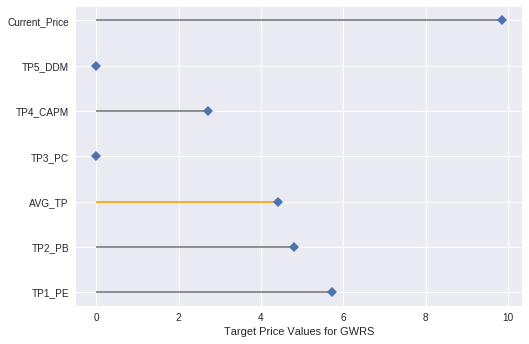

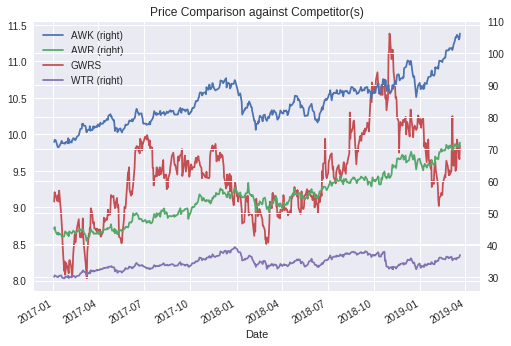

In [0]:
 
# Reorder it following the values:
#ordered_df = df.sort_values(by='TargetPrices')
my_range=range(1,len(df.index)+1)

import seaborn as sns

# Create a color if the group is "B"
my_color=np.where(df ['Labels']=='AVG_TP', 'orange', 'gray')
my_size=np.where(df ['Labels']=='AVG_TP', 200, 100)

 
plt.hlines(y= my_range, xmin=0, xmax=df['TargetPrices'], color= my_color)
plt.plot(df['TargetPrices'], my_range, 'D')
plt.yticks(my_range, df['Labels'])
plt.xlabel("Target Price Values for %s" %(ticker_1))

trend1.plot(  secondary_y= competitor, title = 'Price Comparison against Competitor(s)', grid=True)

plt.show()


### Comparing the Historical Prices Against the Competitors

In [0]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()

In [0]:
#rawdata = pdr.get_data_yahoo(tickers, start="2017-01-01" )

[*********************100%***********************]  25 of 25 downloaded


In [0]:
#trend = rawdata.Close

In [0]:
#Get an array list of all tickers 
all_ticker = trend.columns.tolist()

#Update the Competitor list to compare with the selected ticker
competitor.append(ticker_1)
#competitor

In [0]:
#Remove unwanted tickers 
for i in competitor:
   if i in all_ticker:
      all_ticker.remove(i)

print(all_ticker)

['AAPL', 'AMZN', 'BA', 'BAC', 'BKS', 'C', 'CAT', 'CBS', 'DE', 'DIS', 'EBAY', 'ERJ', 'GOOGL', 'JPM', 'LMT', 'MELI', 'MSFT', 'ORCL', 'TEX', 'WFC', 'WMT']


In [0]:
trend1 = trend.drop(all_ticker, axis=1)
competitor.remove(ticker_1)

In [0]:
competitor

['AWK', 'WTR', 'AWR']

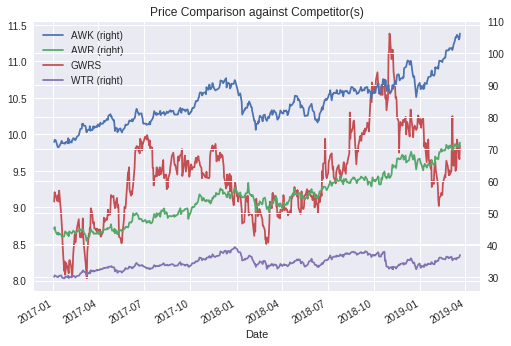

In [0]:
# TREND PLOT 2

#trend1.plot( grid=True)
trend1.plot(  secondary_y= competitor, title = 'Price Comparison against Competitor(s)', grid=True)

plt.show()
#plt.savefig('CloseTrend.png')